## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

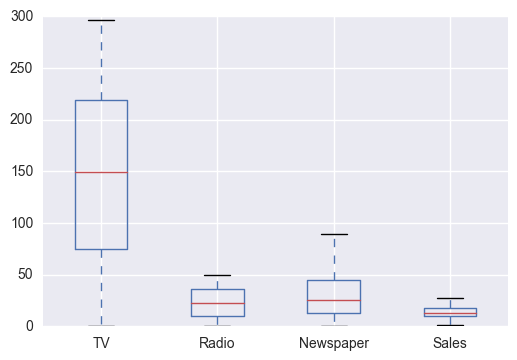

In [2]:
df.boxplot(return_type ='axes')
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

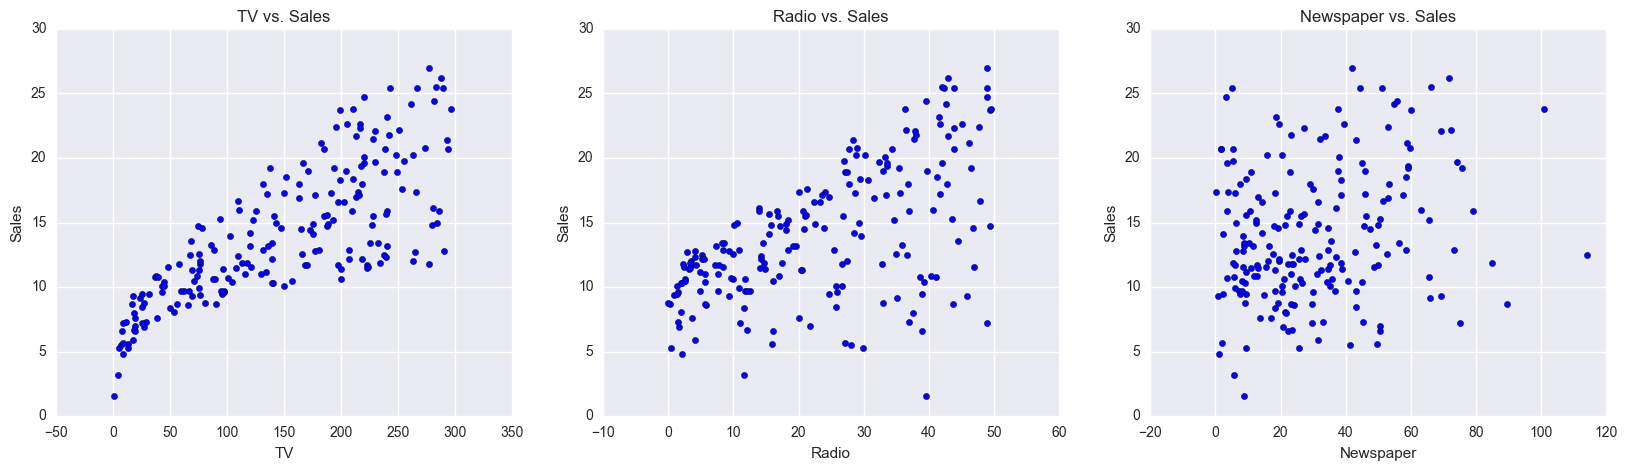

In [3]:
from pandas.tools.plotting import scatter_matrix 
fig = plt.figure()
fig.set_size_inches(20,5)

sub1 = fig.add_subplot(1,3,1)
plt.scatter(df.TV, df.Sales)
sub1.set_title("TV vs. Sales")
sub1.set_xlabel("TV")
sub1.set_ylabel("Sales")

sub2 = fig.add_subplot(1,3,2)
plt.scatter(df.Radio, df.Sales)
sub2.set_title("Radio vs. Sales")
sub2.set_xlabel("Radio")
sub2.set_ylabel("Sales")

sub3 = fig.add_subplot(1,3,3)
plt.scatter(df.Newspaper, df.Sales)
sub3.set_title("Newspaper vs. Sales")
sub3.set_xlabel("Newspaper")
sub3.set_ylabel("Sales")

plt.show()


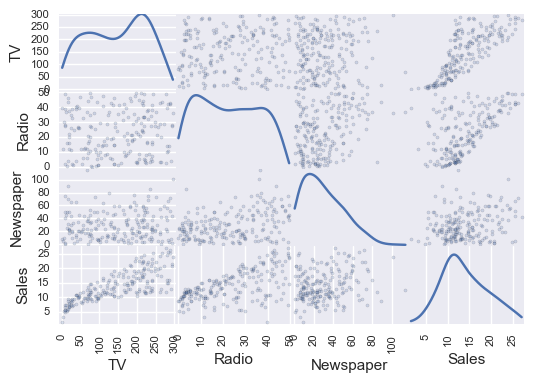

In [4]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df, alpha=0.2, diagonal='kde')
plt.show()

TV correlates with Sales, but not with Newpaper and Radio.
Radio somehow correlates with Sales, but not with Newspaper and TV.
Newspaper dos not correlate with others. 

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [5]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [6]:
y = df.Sales

b) Set X to be just the features described above in df

In [7]:
X = df[['TV','Radio','Newspaper']]
print(X)

        TV  Radio  Newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
6      8.7   48.9       75.0
7     57.5   32.8       23.5
8    120.2   19.6       11.6
9      8.6    2.1        1.0
10   199.8    2.6       21.2
11    66.1    5.8       24.2
12   214.7   24.0        4.0
13    23.8   35.1       65.9
14    97.5    7.6        7.2
15   204.1   32.9       46.0
16   195.4   47.7       52.9
17    67.8   36.6      114.0
18   281.4   39.6       55.8
19    69.2   20.5       18.3
20   147.3   23.9       19.1
21   218.4   27.7       53.4
22   237.4    5.1       23.5
23    13.2   15.9       49.6
24   228.3   16.9       26.2
25    62.3   12.6       18.3
26   262.9    3.5       19.5
27   142.9   29.3       12.6
28   240.1   16.7       22.9
29   248.8   27.1       22.9
30    70.6   16.0       40.8
..     ...    ...        ...
171   50.0   11.6       18.4
172  164.5   20.9       47.4
173   19.6   2

c) Randomly split data into training and testing - 80% training, 20% testing.

In [8]:
size = 200
# Split the data into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [9]:
import numpy as np
from sklearn import preprocessing

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [ 0.0472521   0.179922   -0.00094408]
Residual sum of squares: 2.79
Variance score: 0.90


e) Evalute the R^2 on training data. Is this good? Bad? Why?

This model is pretty good because R^2 = 0.9, the variance of its errors is 90% less than the variance of the dependent variable.

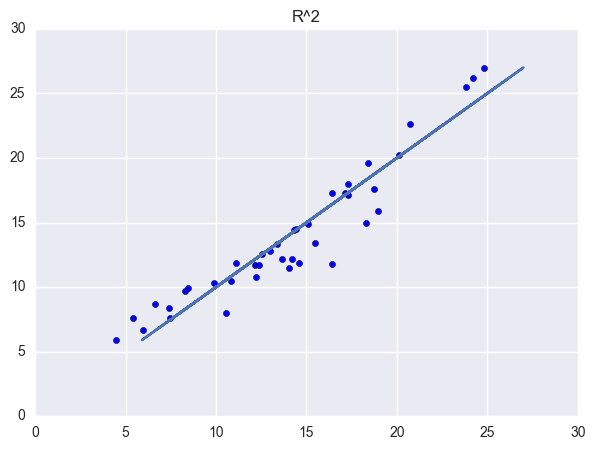

In [10]:
plt.figure(figsize=(7,5))
plt.title('R^2')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

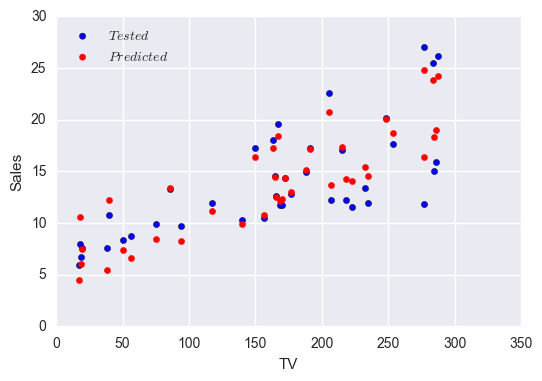

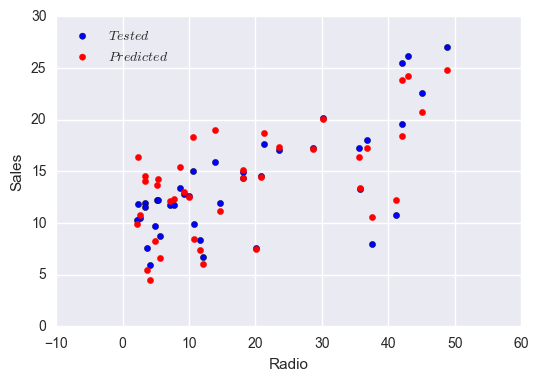

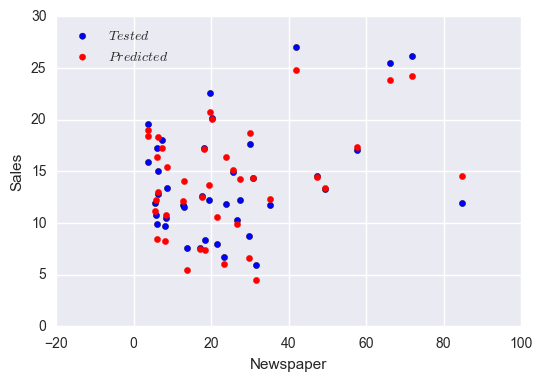

In [11]:
plt.scatter(X_test['TV'],y_test,label='$Tested$')
plt.scatter(X_test['TV'],regr.predict(X_test),color=['red'],label='$Predicted$')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.legend(loc=2)
plt.show()

plt.scatter(X_test['Radio'],y_test,label='$Tested$')
plt.scatter(X_test['Radio'],regr.predict(X_test),color=['red'],label='$Predicted$')
plt.ylabel('Sales')
plt.xlabel('Radio')
plt.legend(loc=2)
plt.show()

plt.scatter(X_test['Newspaper'],y_test,label='$Tested$')
plt.scatter(X_test['Newspaper'],regr.predict(X_test),color=['red'],label='$Predicted$')
plt.ylabel('Sales')
plt.xlabel('Newspaper')
plt.legend(loc=2)
plt.show()


Yes, it is a good model because the tested data are quite similar with the predicted data. 

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

From the result of linear regression coefficient, we can see that Radio feature has the largest coefficient number. However, if we normalize the data, we can see that the coefficent for TV is the largest. Thus, we have to normalize the data first before making conclusions. 

In [12]:
# Normalize data
X_train = preprocessing.scale(X_train)
y_train = preprocessing.scale(y_train)
X_test = preprocessing.scale(X_test)
y_test = preprocessing.scale(y_test)

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [ 0.77430407  0.50534068 -0.00398213]
Residual sum of squares: 0.10
Variance score: 0.90


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

Once we normalize the data, we can see that TV has the largest coefficient number, thus TV is the most important feature. 

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

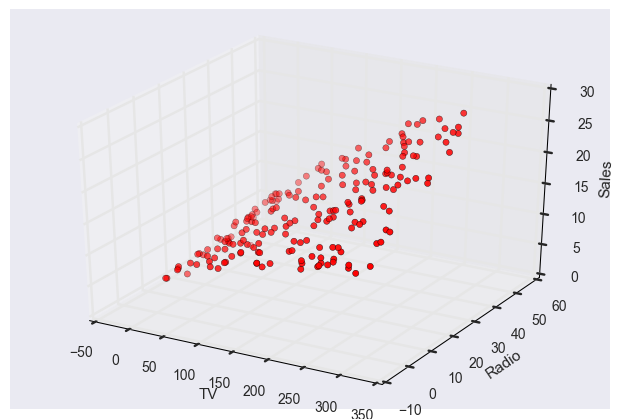

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.TV, df.Radio, df.Sales, c='r', marker='o')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.show()

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


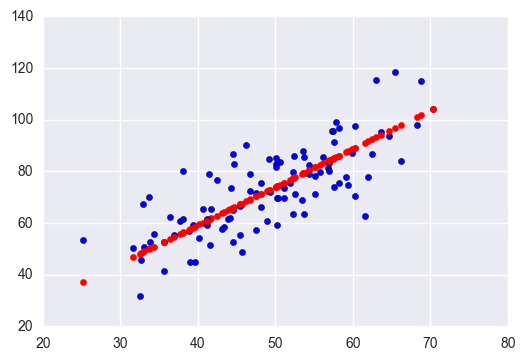

In [14]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../APMAE4990-/data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


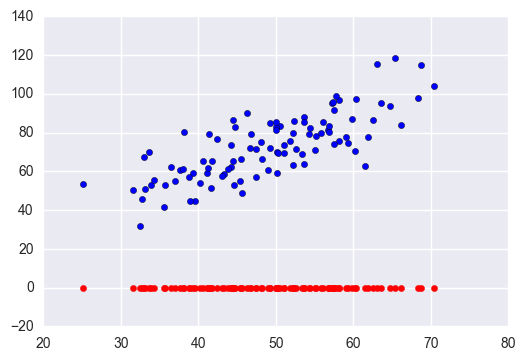

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


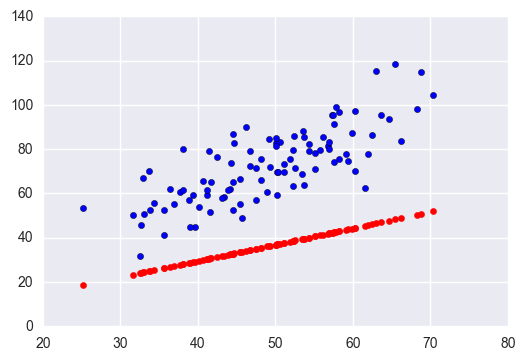

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


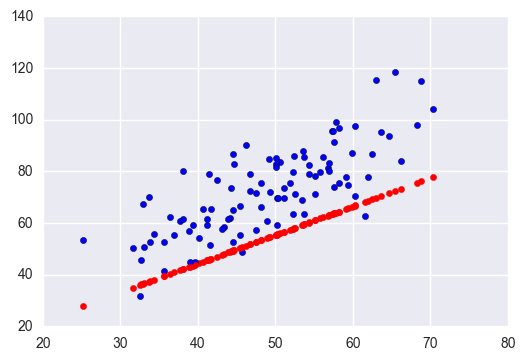

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


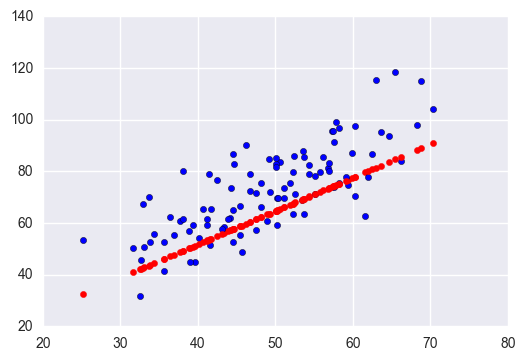

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


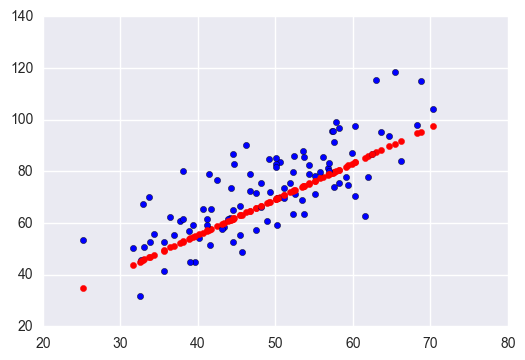

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


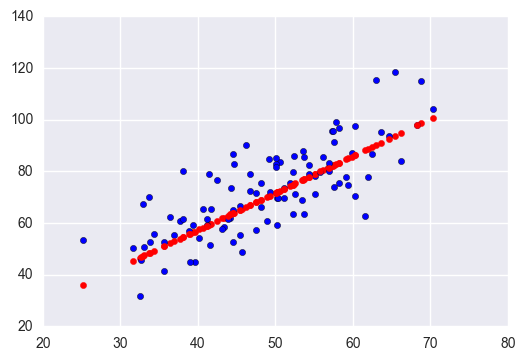

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


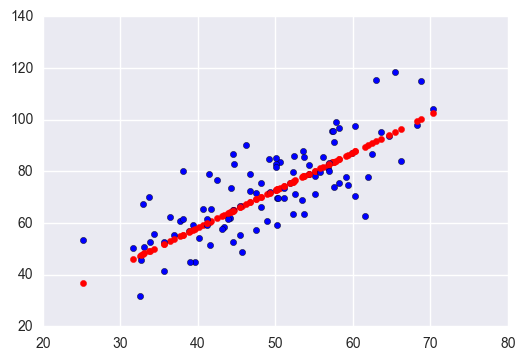

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


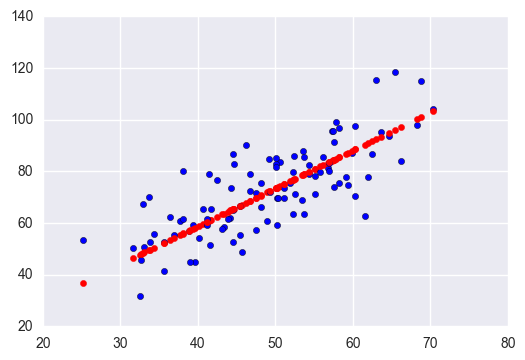

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


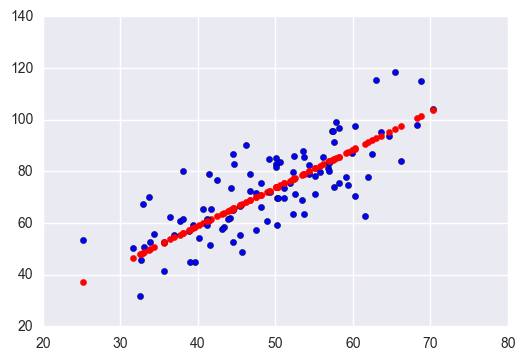

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


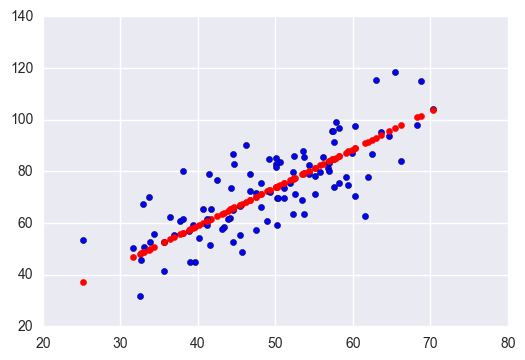

In [15]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

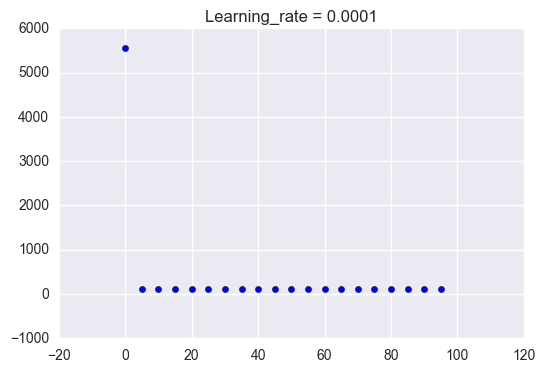

In [16]:
def errorplot(num_iterations, learning_rate):
    points = genfromtxt("../APMAE4990-/data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error =  compute_error_for_line_given_points(b, m, points)
    plt.scatter(num_iterations, error)
    
Learning_rate = 0.0001
for num in range(0,100,5):
    errorplot(num, Learning_rate)
    plt.title('Learning_rate = 0.0001')


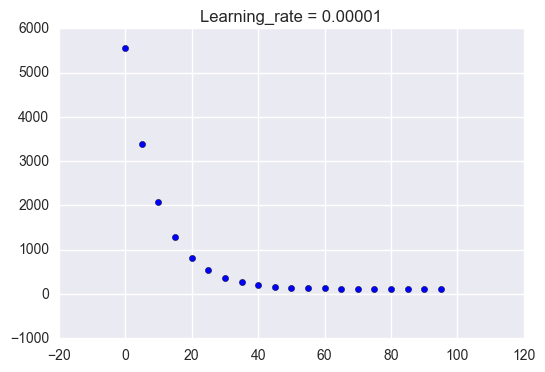

In [17]:
Learning_rate = 0.00001
for num in range(0,100,5):
    errorplot(num, Learning_rate)
    plt.title('Learning_rate = 0.00001')

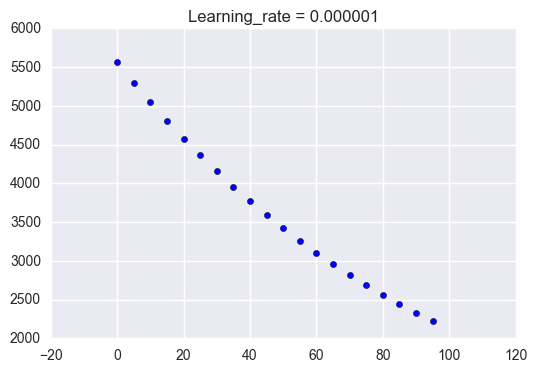

In [18]:
Learning_rate = 0.000001
for num in range(0,100,5):
    errorplot(num, Learning_rate)
    plt.title('Learning_rate = 0.000001')


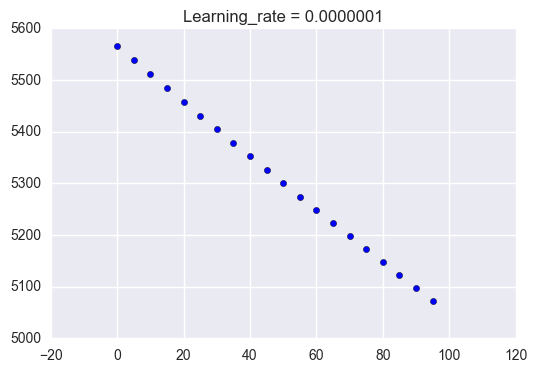

In [19]:
Learning_rate = 0.0000001
for num in range(0,100,5):
    errorplot(num, Learning_rate)
    plt.title('Learning_rate = 0.0000001')